In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import pylab as p 
from sklearn.metrics import accuracy_score
%matplotlib inline

# 1. Importing Modules

In [150]:
train=pd.read_csv('/kaggle/input/playground-series-s3e12/train.csv')


In [151]:
test  = pd.read_csv('/kaggle/input/playground-series-s3e12/test.csv')

In [152]:
sample = pd.read_csv('/kaggle/input/playground-series-s3e12/sample_submission.csv')

In [153]:
sample.head()

,id,target
0,414,0.5
1,415,0.5
2,416,0.5
3,417,0.5
4,418,0.5


In [154]:
sample = sample.drop(columns=['id'])

In [155]:
y_test = sample.iloc[:,0]

In [156]:
test.head(10)

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36
5,419,1.023,5.77,749,20.0,385,4.49
6,420,1.015,5.94,461,17.4,195,3.93
7,421,1.024,5.53,1236,29.0,620,12.68
8,422,1.010,6.79,242,11.2,64,0.65
9,423,1.005,7.20,541,17.8,195,1.03


In [157]:
test.shape

(276, 7)

In [158]:
train.head(10)

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
5,5,1.025,6.90,947,28.4,395,2.64,1
6,6,1.008,5.09,371,15.5,159,2.17,1
7,7,1.015,5.53,450,8.1,170,1.16,0
8,8,1.025,7.38,736,25.3,418,1.52,0
9,9,1.017,6.61,527,20.0,75,4.49,1


In [159]:
train=train.drop(columns=['id'])


In [160]:
train.head(10)

,gravity,ph,osmo,cond,urea,calc,target
0,1.013,6.19,443,14.8,124,1.45,0
1,1.025,5.40,703,23.6,394,4.18,0
2,1.009,6.13,371,24.5,159,9.04,0
3,1.021,4.91,442,20.8,398,6.63,1
4,1.021,5.53,874,17.8,385,2.21,1
5,1.025,6.90,947,28.4,395,2.64,1
6,1.008,5.09,371,15.5,159,2.17,1
7,1.015,5.53,450,8.1,170,1.16,0
8,1.025,7.38,736,25.3,418,1.52,0
9,1.017,6.61,527,20.0,75,4.49,1


In [161]:
train.shape

(414, 7)

In [162]:
train.corr()['target']

gravity    0.282577
ph        -0.094983
osmo       0.244770
cond       0.172224
urea       0.265211
calc       0.467439
target     1.000000
Name: target, dtype: float64

In [163]:
train.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [164]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  414 non-null    float64
 1   ph       414 non-null    float64
 2   osmo     414 non-null    int64  
 3   cond     414 non-null    float64
 4   urea     414 non-null    int64  
 5   calc     414 non-null    float64
 6   target   414 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 22.8 KB


In [165]:
train.columns

Index(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

# 2. Outlier Detection


<AxesSubplot:>

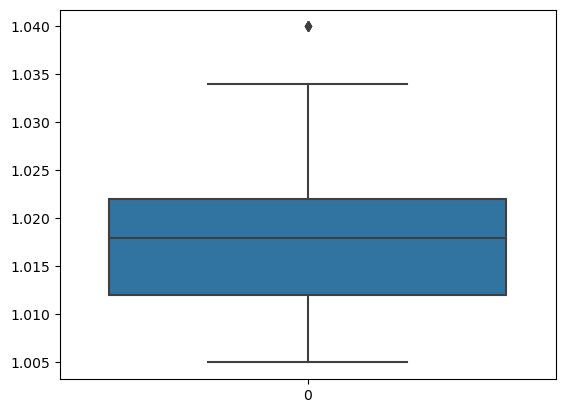

In [166]:
sns.boxplot(train['gravity'])

**Removing Outliers from gravity**

In [167]:
train = train[train['gravity']<1.036]

<AxesSubplot:>

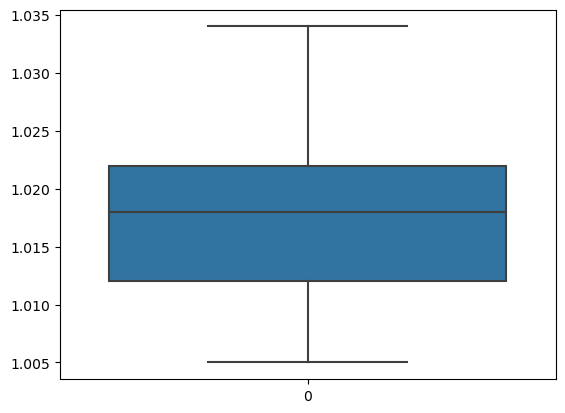

In [168]:
sns.boxplot(train['gravity'])

<AxesSubplot:>

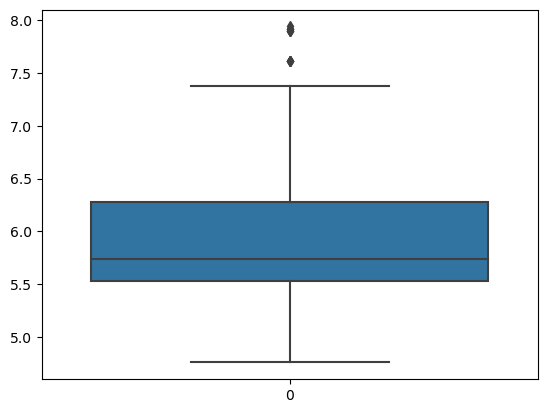

In [169]:
sns.boxplot(train['ph'])

In [170]:
train = train[train['ph']<7.1]

<AxesSubplot:>

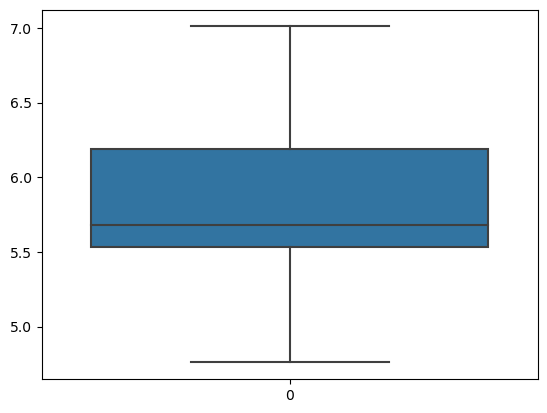

In [171]:
sns.boxplot(train['ph'])

<AxesSubplot:>

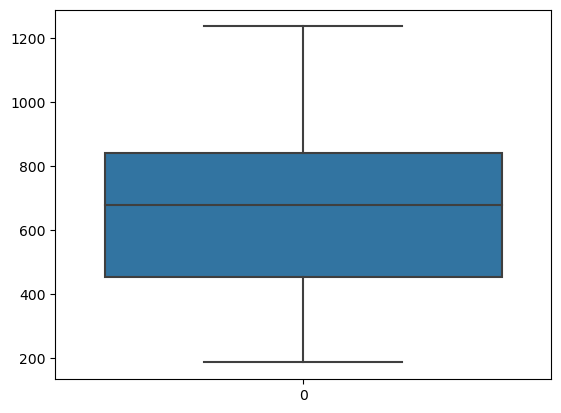

In [172]:
sns.boxplot(train['osmo'])


<AxesSubplot:>

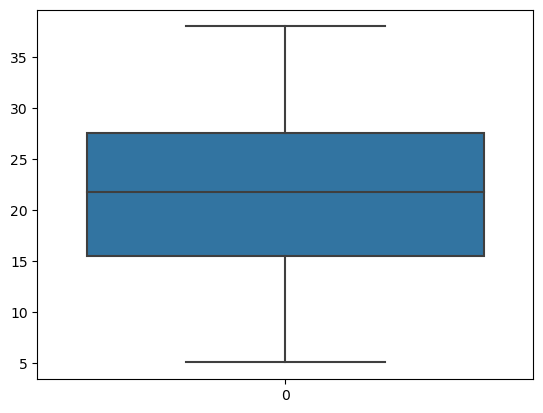

In [173]:
sns.boxplot(train['cond'])


<AxesSubplot:>

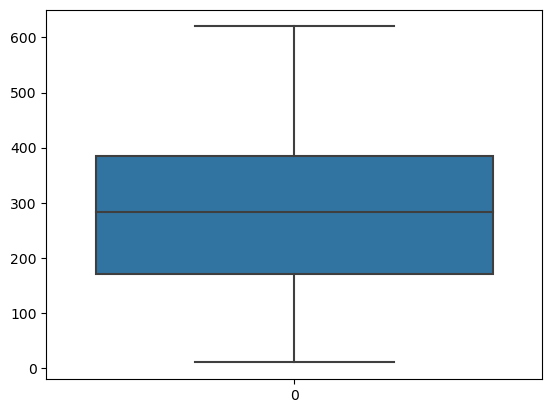

In [174]:
sns.boxplot(train['urea'])


<AxesSubplot:>

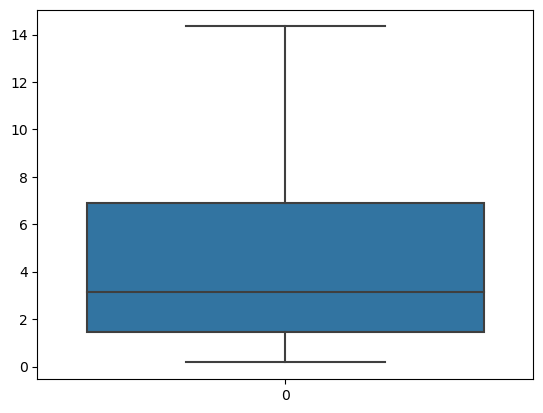

In [175]:
sns.boxplot(train['calc'])

# 3. Identifying the distributions 

ValueError: 45 option for line not understood

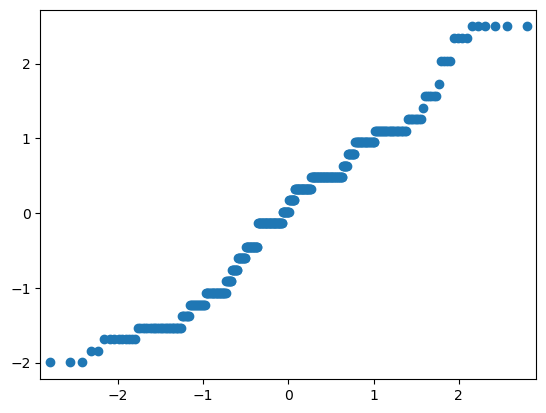

In [176]:
fig = sm.qqplot(train['gravity'],line=45,fit=True)


ValueError: 45 option for line not understood

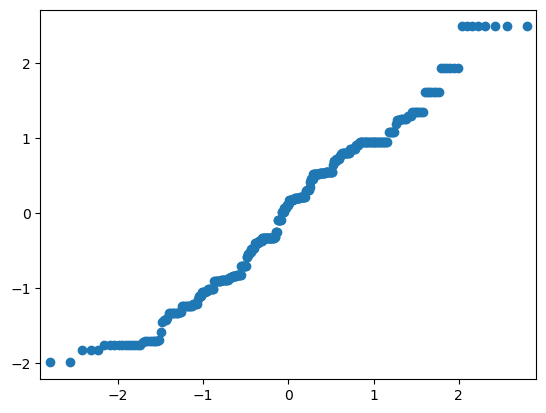

In [177]:
fig = sm.qqplot(train['osmo'],line=45,fit=True)

ValueError: 45 option for line not understood

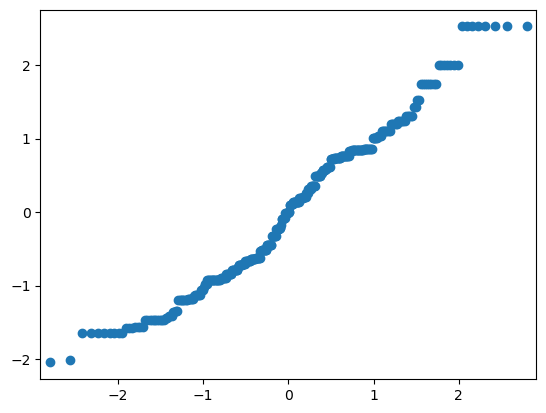

In [178]:
fig = sm.qqplot(train['urea'],line=45,fit=True)

ValueError: 45 option for line not understood

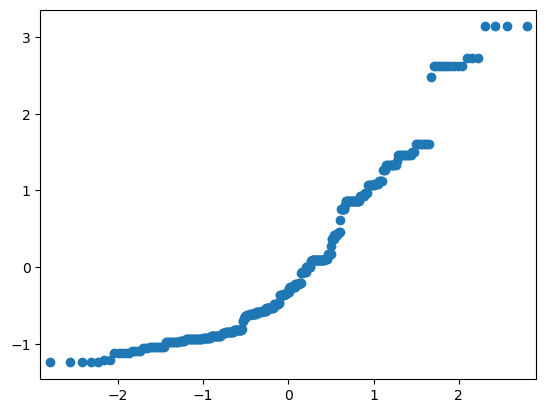

In [179]:
fig = sm.qqplot(train['calc'],line=45,fit=True)

ValueError: 45 option for line not understood

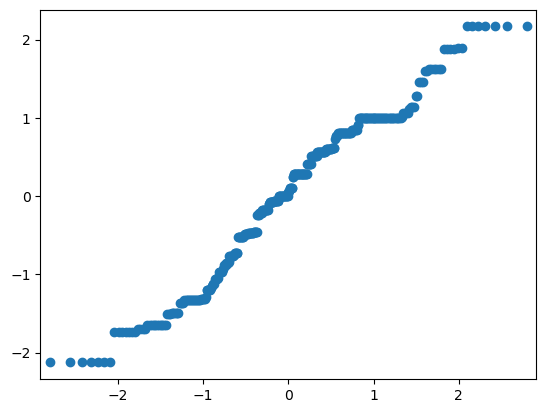

In [180]:
fig = sm.qqplot(train['cond'],line=45,fit=True)

**Data is not perfectly normally distributed**

**converting it into normally distributed data**

In [181]:
train.head(10)

,gravity,ph,osmo,cond,urea,calc,target
0,1.013,6.19,443,14.8,124,1.45,0
1,1.025,5.40,703,23.6,394,4.18,0
2,1.009,6.13,371,24.5,159,9.04,0
3,1.021,4.91,442,20.8,398,6.63,1
4,1.021,5.53,874,17.8,385,2.21,1
5,1.025,6.90,947,28.4,395,2.64,1
6,1.008,5.09,371,15.5,159,2.17,1
7,1.015,5.53,450,8.1,170,1.16,0
9,1.017,6.61,527,20.0,75,4.49,1
10,1.017,6.81,680,25.7,282,0.17,1


In [182]:
x=train.iloc[:,:-1]

In [183]:
x

,gravity,ph,osmo,cond,urea,calc
0,1.013,6.19,443,14.8,124,1.45
1,1.025,5.40,703,23.6,394,4.18
2,1.009,6.13,371,24.5,159,9.04
3,1.021,4.91,442,20.8,398,6.63
4,1.021,5.53,874,17.8,385,2.21
...,...,...,...,...,...,...
408,1.024,5.68,874,29.0,380,8.94
409,1.011,5.21,527,21.4,75,1.53
410,1.024,5.53,577,19.7,224,0.77
411,1.018,6.28,455,22.2,270,7.68


In [184]:
y

0      0
1      0
2      0
3      1
4      1
      ..
408    1
409    0
410    0
411    1
413    0
Name: target, Length: 383, dtype: int64

In [185]:
y = train.iloc[:,-1]

In [186]:
pt=PowerTransformer(method='yeo-johnson')

In [187]:
x = pt.fit_transform(x)

In [188]:
  
print( '\nSkewness for data : ', skew(x))


Skewness for data :  [ 0.00577221  0.01909991 -0.07886965 -0.13121406 -0.08522435  0.01625285]


In [189]:
x.shape

(383, 6)

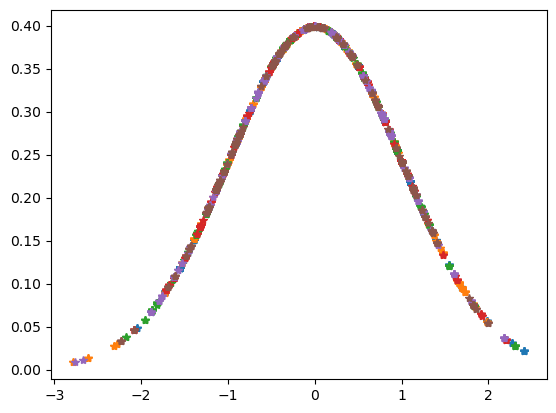

In [190]:
y1 = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x)**2  )
  
p.plot(x, y1, '*')

****Now the data is normally distributed****

# 4. Training the model

In [191]:
lr = LinearRegression()

In [192]:
lr.fit(x,y)

LinearRegression()

In [193]:
x_test = test.iloc[:,1:]

# 5.Predictions

In [194]:
y_pred = lr.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [195]:
np.savetxt("Submission.csv", y_pred, delimiter=",")

In [196]:
submission = pd.read_csv('/kaggle/working/Submission.csv')

In [197]:
submission.head()

,2.242501603221861650e+00
0,4.804961
1,6.445821
2,3.899188
3,3.541910
4,4.722029


In [198]:
submission.columns

Index(['2.242501603221861650e+00'], dtype='object')